# Принятие решений в бизнесе на основе данных

## Общая информация

**Цель** 


Вместе с отделом маркетинга из подготовленного списка гипотез выбрать те, что помогут увеличить выручку.

**Задачи**: 
- приоритизировать гипотезы,
- запустить A/B-тест,
- проанализировать результаты.
- сделать выводы
- принять решение об остановке/продолжению эксперимента

## Чтение данных

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from scipy import stats

import warnings
warnings.filterwarnings("ignore") 

import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

import plotly.io as pio
pio.renderers.default='notebook'

import matplotlib.pyplot as plt

pd.set_option("max_colwidth", 200) # ширина окна, для чтения гипотез

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv',parse_dates=['date'])
    visitors = pd.read_csv('visitors.csv', parse_dates=['date'])

## Изучение и подготовка данных

### Описание данных

`hypothesis.csv`

- _Hypothesis_ — краткое описание гипотезы;
- _Reach_ — охват пользователей по 10-балльной шкале;
- _Impact_ — влияние на пользователей по 10-балльной шкале;
- _Confidence_ — уверенность в гипотезе по 10-балльной шкале;
- _Efforts_ — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

`orders.csv`

- _transactionId_ — идентификатор заказа;
- _visitorId_ — идентификатор пользователя, совершившего заказ;
- _date_ — дата, когда был совершён заказ;
- _revenue_ — выручка заказа;
- _group_ — группа A/B-теста, в которую попал заказ.

`visitors.csv`

- _date_ — дата;
- _group_ — группа A/B-теста;
- _visitors_ — количество пользователей в указанную дату в указанной группе A/B-теста

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Часть 1. Приоритизация гипотез.

### Задачи

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [6]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**
- Приоритизация гипотез:
    - **8**: Запустить акцию, дающую скидку на товар в день рождения
    - **0**: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - **7**: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [7]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
- Приоритизация гипотез (после округления):
    - **7**: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    - **2**: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    - **0**: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - **6**: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Выводы

- При использовании фреймворка `ICE` для приоритизации гипотез лидерами стали гипотезы **8, 0, 7**. 
- При использовании фреймворка `RICE` для приоритизации гипотез лидерами стали гипотезы **7, 2, 0, 6**.
- Гипотезы **0,7** перекликаются в использованных фреймфорках.
- Но сами наборы гипотез различаются: это связано с тем, что `ICE` не учитывает охват пользователей в отличие от `RICE`.
- При наличии возможности лучше использовать `RICE` в связи с тем, что охват пользователей важная метрика. Потому что она влияет на приоритизацию гипотез.

## Часть 2. Анализ A/B-теста.

### Задачи

При проведении A/B-теста мы получили результаты, которые описаны в файлах `orders.csv` и `visitors.csv`.

**Проанализируйте A/B-тест**:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

#### Изучение данных

In [8]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
# проверяем не переместились ли пользователи из одной группы в другую. 
# Удаляем индексы visitorId. Смотрим группу А и В, очищаем
duplicates = orders.loc[orders['group'] == 'A', 'visitorId'].isin(orders.loc[orders['group'] == 'B', 'visitorId'])
orders = orders.drop(duplicates[duplicates].index)
orders.info()
# получилось 89 человек

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1108 non-null   int64         
 1   visitorId      1108 non-null   int64         
 2   date           1108 non-null   datetime64[ns]
 3   revenue        1108 non-null   int64         
 4   group          1108 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 51.9+ KB


**Выод**

- Наличие пользователей попавших в обе группы сильно влияет на результаты теста. Мы проверили, у нас их нет.
- Сравнивать количество групп A/B теста не нужно, потому что у нас заданные величины, изменение может повлиять на результаты.

#### Визуализация графика кумулятивной выручки по группам. 

In [11]:
groups = orders[['date','group']].drop_duplicates() 

orders_com = groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                          orders['group'] == x['group'])] \
                          .agg({'date': 'max',
                                'group': 'max',
                                'transactionId': 'nunique',
                                'visitorId': 'nunique',
                                'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

orders_com.head(6)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,66,60,346854
310,2019-08-03,B,61,59,380996


In [12]:
visitors_com = groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                              visitors['group'] == x['group'])] \
                            .agg({'date': 'max',
                                  'group': 'max',
                                  'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

visitors_com.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [13]:
# объединяем

cumulative_data = orders_com.merge(
    visitors_com, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.head(6)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,61,59,380996,1803


In [14]:
cumulative_data = orders_com.merge(
    visitors_com, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'paying_visitors',
    'revenue',
    'visitors'
]

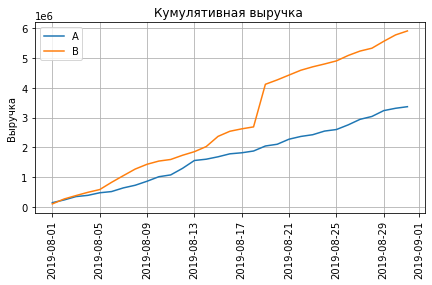

In [15]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue','visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'visitors']]

plt.figure(figsize=(7, 3.5)) # размер
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.grid(True) # вывод сетки
# доработка
plt.ylabel("Выручка")
plt.title("Кумулятивная выручка ");

**Вывод**:
- Выручка равномерно увеличивается в течение всего теста в обеих группах. Хороший знак.
- Однако график выручки группы B резко скачет с 18 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Визуализация графика кумулятивного среднего чека по группам.

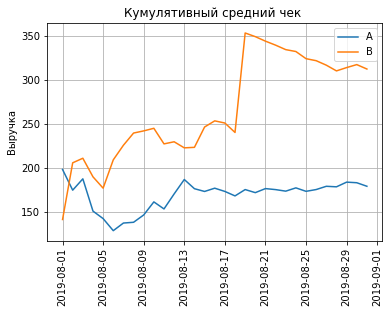

In [16]:
#средний чек cumulativeRevenueA['revenue']/cumulativeRevenueA['значение']
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['visitors'], label='B')
plt.legend()
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.grid(True) # вывод сетки
# доработка
plt.ylabel("Выручка")
plt.title("Кумулятивный средний чек ");

**Вывод**:
- На графиках заметны колебания средних чеков обеих групп. Средний чек группы A стабилизируется после 15 августа.
- На графике виден резкий скачок среднего чека группы B 18 августа. Это может сигнализировать о появлении очень дорогих заказов в выборке.
- Принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

#### Визуализация графика относительного изменения кумулятивного среднего чека группы B к группе A.

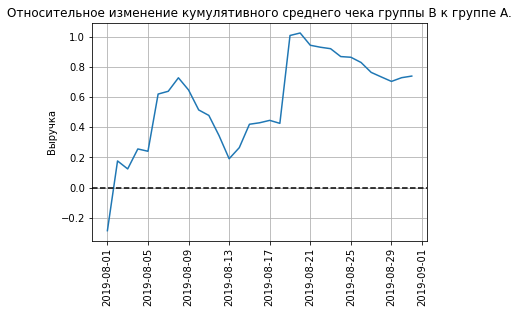

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.grid(True) # вывод сетки
# доработка
plt.ylabel("Выручка")
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A.");

**Вывод**:
- Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.
- Это уже третий "звоночек" о том, чтобы мы детально поработали с аномалиями

#### Визуализация графика кумулятивного среднего количества заказов на посетителя по группам. 

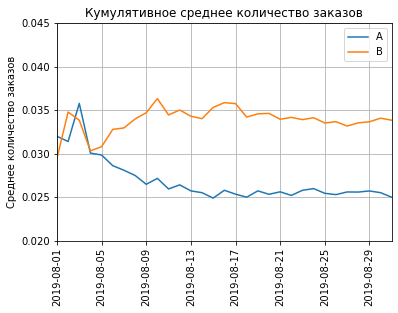

In [18]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.grid(True) # вывод сетки
plt.ylabel("Среднее количество заказов")
plt.title("Кумулятивное среднее количество заказов")
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.045]);

**Вывод**:
- В самом начале теста группа A имела бОльшую конверсию в сравнении с группой B, однако постепенно конверсия группы B выровнялась и вышла на плато, превышая значения группы A.

#### Визуализация графика относительного изменения кумулятивной конверсии группы B к группе A.

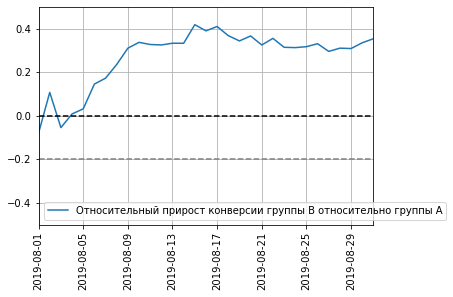

In [19]:
mergedCumulativeConversions = cumulative_dataA[['date','conversion']].merge(cumulative_dataB[['date','conversion']],
                                                                            left_on='date', right_on='date', how='left',
                                                                            suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.grid(True) # вывод сетки

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]);

**Вывод**:
- Группа B уверенно лидирует на протяжении практически всего периода: линия идёт наверх после 5 августа, а затем фиксируется около прироста примерно в 32%.
- А еще в последней трети эксперимента наблюдается стабилизация результатов

#### Визуализация точечного графика количества заказов по пользователям. 

In [20]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False) \
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns = ['userId', 'orders']

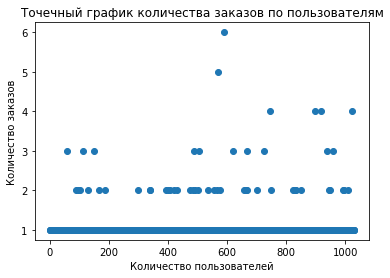

In [21]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')

plt.show();

**Вывод**:
- Большинство пользователей сделали 1 заказ. Пользователей, сделавших более 2 заказов, достаточно мало.

#### Подсчет 95-й и 99-й перцентилей количества заказов на пользователя. 

In [22]:
print('95-й выборочный перцентиль количества заказов по пользователям:',
      (np.percentile(orders_by_users['orders'], 95)))
print('99-й выборочный перцентиль количества заказов по пользователям:',
      (np.percentile(orders_by_users['orders'], 99)))

95-й выборочный перцентиль количества заказов по пользователям: 1.5
99-й выборочный перцентиль количества заказов по пользователям: 3.0


**Вывод**:
- Не более, чем 5% пользователей совершили более 1 заказа. 
- Не более, чем 1% пользователей совершили более 3 заказов.
- Пользователей, совершивших более 2 заказов, можно рассматривать как аномальные значения и среднее количество заказов рассматривать как один.

#### Визуализация точечного графика стоимостей заказов. 

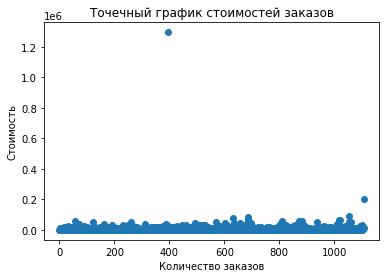

In [23]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.title('Точечный график стоимостей заказов')

plt.show();

**Вывод**:
- По такому графику сложно сделать выводы и предположения. Можно только сказать, что есть выбросы, или аномально большие заказы. Лучше посмотреть 95-й и 99-й перцентили стоимости заказов.

#### Посчет 95-й и 99-й перцентилей стоимости заказов.

In [24]:
print('95-й выборочный перцентиль стоимости заказов по пользователям:',
      (np.percentile(orders['revenue'], 95)).round(2))
print('99-й выборочный перцентиль стоимости заказов по пользователям:',
      (np.percentile(orders['revenue'], 99)).round(2))

95-й выборочный перцентиль стоимости заказов по пользователям: 28033.75
99-й выборочный перцентиль стоимости заказов по пользователям: 56457.78


**Вывод**:
- Не более, чем 5% заказов дороже 28 тыс. руб. 
- Не более, чем 1% заказов дороже 56 тыс. руб.
- Заказы свыше 28033.75 (или 28034 руб. если округлить) можно рассматривать как аномальные значения. Потому что больше всего пользователей сделали +- один заказ.

**В шагах мы**:
- Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
- Увидели выбросы и нашли границу для их определения.

- Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
- Сформулируем гипотезы. Нулевая: различий  в конверсии между между группами нет. Альтернативная: различия в конверсии между группами есть.

#### Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "сырым" данным

**Введем нулевую и альтернативные гипотезы**:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Различий в количестве заказов между группами нет.}\\
   H_1 :\text{Различия в количестве заказов между группами есть.}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Рассчитаем p-value. Если p-value будет меньше выбранного уровня значимости ($\alpha = 0.05$), то будут основания отвергнуть нулевую гипотезу в пользу альтернативной. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [25]:
# Сбор данных

# Группа А
daily_visitors_a = visitors.query('group == "A"')[['date', 'visitors']]

# С помощью lambda-функции итерируемся по каждой строке датафрейма и сравниваем: 
# если дата или даты (если прошли больше n итераций) (daily_visitors_a['date']) 
# меньше даты в текущей ячейке, в которой мы находимся на конкретном шаге итерации (x['date']), 
# то суммируй ее/их значения столбца visitors со значением visitors в текущей ячейке ('visitors': 'sum'), 
# а дату оставляй максимальную из 2-х/3-х/n ('date': 'max'). 
# Таким образом, получаем кумулятивную сумму для каждой даты, учитывая предыдущие (меньшие) даты.

cum_visitors_a = daily_visitors_a.apply(
    lambda x: daily_visitors_a[daily_visitors_a['date'] <= x['date']]
    .agg({'date': 'max',
          'visitors': 'sum'}), axis=1)

cum_visitors_a.columns = [
    'date', 
    'num_visitors_a'
]

daily_orders_a = (
    orders
    .query('group == "A"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique',
          'revenue': 'sum'})
)


cum_orders_a = daily_orders_a.apply(
    lambda x: daily_orders_a[daily_orders_a['date'] <= x['date']]
    .agg({'date': 'max', 
          'transactionId': 'sum', 
          'revenue': 'sum'}), axis=1).sort_values(by=['date'])

cum_orders_a.columns = [
    'date',
    'num_orders_a',
    'revenue_a',
]

In [26]:
# Группа B
daily_visitors_b = visitors.query('group == "B"')[['date', 'visitors']]

cum_visitors_b = daily_visitors_b.apply(
    lambda x: daily_visitors_b[daily_visitors_b['date'] <= x['date']] # 
    .agg({'date': 'max',
          'visitors': 'sum'}), axis=1)

cum_visitors_b.columns = [
    'date', 
    'num_visitors_b'
]

daily_orders_b = (
    orders
    .query('group == "B"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique',
          'revenue': 'sum'})
)


cum_orders_b = daily_orders_b.apply(
    lambda x: daily_orders_b[daily_orders_b['date'] <= x['date']]
    .agg({'date': 'max', 
          'transactionId': 'sum', 
          'revenue': 'sum'}), axis=1).sort_values(by=['date'])

cum_orders_b.columns = [
    'date',
    'num_orders_b',
    'revenue_b',
]

In [27]:
# Объединение

final_data = (
    daily_orders_a.merge(
        daily_orders_b, left_on='date', right_on='date', how='left'
    )
    .merge(cum_orders_a, left_on='date', right_on='date', how='left')
    .merge(cum_orders_b, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_a, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_b, left_on='date', right_on='date', how='left')
    .merge(cum_visitors_a, left_on='date', right_on='date', how='left')
    .merge(cum_visitors_b, left_on='date', right_on='date', how='left')
)

In [28]:
# Переменные для определения статистической значимости в количестве заказов  между группами по «сырым» данным

# Группа А
orders_by_users_a = (
    orders.query('group == "A"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users_a.columns = ['visitorId', 'num_orders']

sample_a = pd.concat(
    [
        orders_by_users_a['num_orders'],
        pd.Series(
            0,
            index=np.arange(
                final_data['visitors_x'].sum() - len(orders_by_users_a['num_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [29]:
# Группа В

orders_by_users_b = (
    orders.query('group == "B"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users_b.columns = ['visitorId', 'num_orders']

sample_b = pd.concat(
    [
        orders_by_users_b['num_orders'],
        pd.Series(
            0,
            index=np.arange(
                final_data['visitors_y'].sum() - len(orders_by_users_b['num_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [30]:
alpha = .05

results = stats.mannwhitneyu(sample_a, sample_b, alternative='two-sided')[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований, чтобы отвергунть нулевую гипотезу')
    
print('Относительный прирост количества заказов группы В к количеству заказов группы А в процентах:',
      "{0:.2f}".format(((final_data['transactionId_y'].sum() / final_data['visitors_y'].sum()) /
      (final_data['transactionId_x'].sum() / final_data['visitors_x'].sum()) - 1) * 100), '%')
# в количестве заказов

p-value: 0.000017
Имеются основания отвергнуть нулевую гипотезу
Относительный прирост количества заказов группы В к количеству заказов группы А в процентах: 35.45 %


**Вывод**:
- На доступных данных на 5% уровне значимости имеются основания отвергнуть нулевую гипотезу в пользу альтернативной (`p-value` меньше уровня значимости (0.05)).
- Обнаружены статистически значимые различия между группами. Есть существенное различие в в количестве заказов пользователей групп A и B.
- Относительный прирост количества заказов группы В к количеству заказов группы А в процентах: 35.45 %

### Посчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

**Введем нулевую и альтернативные гипотезы**:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Различий в среднем чеке между группами нет}\\
   H_1 :\text{Различия в среднем чеке между группами есть.}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Рассчитаем p-value. Если p-value будет меньше выбранного уровня значимости ($\alpha = 0.05$), то будут основания отвергнуть нулевую гипотезу в пользу альтернативной. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [31]:
results = stats.mannwhitneyu(
    orders.query('group == "A"')['revenue'],
    orders.query('group == "B"')['revenue'],
    alternative='two-sided')[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований, чтобы отвергунть нулевую гипотезу')
    
print('Относительный прирост среднего чека группы B:',
      '{0:.2f}'.format((orders.query('group == "B"')['revenue'].mean() /
                        orders.query('group == "A"')['revenue'].mean() - 1) * 100), '%')

p-value: 0.764664
Недостаточно оснований, чтобы отвергунть нулевую гипотезу
Относительный прирост среднего чека группы B: 28.39 %


**Вывод**:
- На доступных данных на 5% уровне значимости недостаточно оснований, чтобы отвергнуть нулевую гипотезу в пользу альтернативной (`p-value` сильно больше уровня значимости (0.05)).
- Относительный прирост среднего чека группы В к среднему чеку группы А равен 28.39 %, что не является статистически значимым. На данное значение могли повлиять выбросы, которые мы наблюдали на графиках ранее.

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. 

In [32]:
# Выделение аномальных записей

abnormal_orders = pd.concat(
    [
        orders_by_users_a.query('num_orders > 2')['visitorId'],
        orders_by_users_b.query('num_orders > 2')['visitorId']
    ],
    axis=0,
)

abnormal_revenue = orders[orders['revenue'] > 28034]['visitorId']

abnormal_data = (
    pd.concat([abnormal_orders, abnormal_revenue], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [33]:
sample_a_normal = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorId'].isin(abnormal_data))
        ]['num_orders'],
        pd.Series(
            0,
            index=np.arange(
                final_data['visitors_x'].sum() - len(orders_by_users_a['num_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_normal = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorId'].isin(abnormal_data))
        ]['num_orders'],
        pd.Series(
            0,
            index=np.arange(
                final_data['visitors_y'].sum() - len(orders_by_users_b['num_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [34]:
results = stats.mannwhitneyu(
    sample_a_normal, 
    sample_b_normal, 
    alternative='two-sided')[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований, чтобы отвергунть нулевую гипотезу')
    
print('Относительный прирост конверсии группы В к конверсии группы А:',
      '{0:.2f}'.format((sample_b_normal.mean() / sample_a_normal.mean() - 1) * 100), '%')

p-value: 0.000060
Имеются основания отвергнуть нулевую гипотезу
Относительный прирост конверсии группы В к конверсии группы А: 30.70 %


**Вывод**:
- На доступных данных на 5% уровне значимости имеются основания отвергнуть нулевую гипотезу в пользу альтернативной (`p-value` меньше уровня значимости (0.05)).
- Обнаружены статистически значимые различия между группами. Видно существенное различие в конверсиях пользователей групп A и B.
- Относительный прирост конверсии группы В к конверсии группы А равен 30.7%. Значение близко к полученному на "сырых" данных. Значит, конверсия не сильно зависела от аномалий и выбросов. По значению относительного прироста конверсии мы видим, что группа В показала себя лучше.

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [35]:
results = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormal_data))
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormal_data))
        )
    ]['revenue'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Имеются основания отвергнуть нулевую гипотезу')
else:
    print('Недостаточно оснований, чтобы отвергунть нулевую гипотезу')
    
print(
    'Относительный прирост среднего чека группы B к среднему чеку группы А:',
    "{0:.2f}".format((
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_data)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_data)),
            )
        ]['revenue'].mean() - 1) * 100), '%') 

p-value: 0.934248
Недостаточно оснований, чтобы отвергунть нулевую гипотезу
Относительный прирост среднего чека группы B к среднему чеку группы А: -0.23 %


**Вывод**:
- На доступных данных на 5% уровне значимости недостаточно оснований, чтобы отвергнуть нулевую гипотезу в пользу альтернативной (`p-value` сильно больше уровня значимости (0.05)).
- Относительный прирост среднего чека группы B к среднему чеку группы А меньше 0. Такое большое различие со значением относительного прироста среднего чека на сырых данных связано с наличием аномалий / выбросов. 
- В тоже время, между группами статистически значимых различий не обнаружено.

#### По результатам теста из вариантов решений  
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест. 
**Был сделан вывод:**

- Есть статистически значимые различия по конверсии между группами и по «сырым» данным, и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, значение относительного прироста конверсии группы В к конверсии группы А и график относительного изменения кумулятивной конверсии группы B к группе A подтверждают данную информацию. Наблюдается тенденция к росту.
- График кумулятивного среднего чека по группам указал на аномальные значения, после очистки от выбросов средний чек группы B не отличается от среднего чека группы A.

**Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу одной из групп. Средний чек не изменился, но возросла конверсия, следовательно, увеличилось количество покупателей.**